<a href="https://colab.research.google.com/github/A01732830/Entregable-3/blob/main/regresion_linea3_micro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
micro = pd.read_csv('Microretailer_limpio_evidencia2.csv')
micro.head(5)

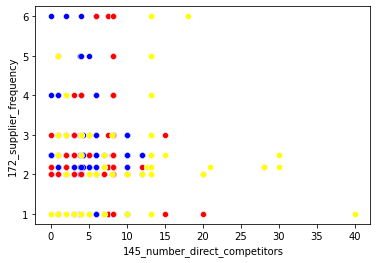

In [ ]:
#Se grafican mapas de disperision de las variables #competidores, #refrigeradores, #muebles
from turtle import color

sns.scatterplot(x='145_number_direct_competitors', y='172_supplier_frequency', color='blue', data=micro)
sns.scatterplot(x='62_frequency_only_services', y='172_supplier_frequency', color='red', data=micro)
sns.scatterplot(x='317_home_deliveries', y='172_supplier_frequency', color='yellow', data=micro)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep=micro[['145_number_direct_competitors', '62_frequency_only_services', '317_home_deliveries']]
Var_Dep=micro['172_supplier_frequency']

In [ ]:
#se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
from numpy.lib.twodim_base import vander
#ajustamos el modela con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
LinearRegression()

LinearRegression()

In [ ]:
#verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['145_number_direct_competitors', '62_frequency_only_services',
        '317_home_deliveries'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.02245814, -0.00989571,  0.02458005]),
 '_residues': 284.08791510944377,
 'rank_': 3,
 'singular_': array([78.54278564, 46.53476565, 43.71912517]),
 'intercept_': 1.9036830398033942}

y = 0.02245814(145_number_direct_competitors) - 0.00989571(62_frequency_only_services) + 0.02458005(317_home_deliveries) + 1.9036830398033942

In [ ]:
#evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 
model.score(Vars_Indep,Var_Dep)

0.012990520857026122

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: '#competidores', 'frec servicios' y 'entregas a domicilio'
y_pred = model.predict(X=micro[['145_number_direct_competitors', '62_frequency_only_services', '317_home_deliveries']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
micro.insert(0, 'Predicciones', y_pred)
micro

,Predicciones,Unnamed: 0,228_store_name,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,...,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency
0,2.236827,0,MINI SUPER 3 NORTE,Grocery store (aka. nanostore),no,no,yes,Analog cash register,no,no,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,4.0
1,2.236827,1,Miscelánea,Grocery store (aka. nanostore),no,no,yes,Analog cash register,yes,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,1.0
2,2.281744,2,Miscelánea casa cruz,Grocery store (aka. nanostore),no,no,no,Analog cash register,yes,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,3.0
3,2.191911,3,SUPER & ALMACENES,Chacharas,no,no,no,POS system (i.e. computer + bar code scanner +...,yes,yes,...,3.9,1.0,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.0
4,2.281744,4,Ranita “V”,Grocery store (aka. nanostore),no,no,no,Analog cash register,yes,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2.330535,439,Xuti Galería,productos tradicionales,no,yes,no,Analog cash register,yes,yes,...,3.9,1.0,12.0,1.4,12.0,6.5,13.2,1.0,2.2,5.0
440,2.241319,440,July Store,Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",no,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.5
441,2.241319,441,La fonda,Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,no,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.5
442,2.241319,442,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,no,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.5


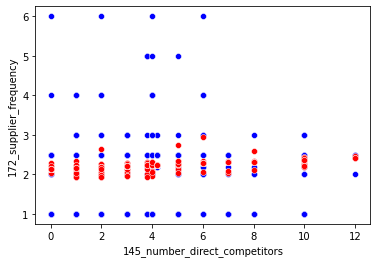

In [ ]:
#Comparamos entre total real y total predictivo
sns.scatterplot(x='145_number_direct_competitors', y='172_supplier_frequency', color="blue" , data=micro)
sns.scatterplot(x='145_number_direct_competitors', y='Predicciones', color="red" , data=micro)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep,y=Var_Dep)
coef_Deter

0.012990520857026122

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.11397596613771749